In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [2]:
df = pd.read_csv('../Dataset/data_clean.csv')
df.head()

,Unnamed: 0,Outstanding_Debt,Annual_Income,Monthly_Inhand_Salary,Credit_History_Age,Interest_Rate,Monthly_Balance,Delay_from_due_date,Total_EMI_per_month,Changed_Credit_Limit,Num_of_Loan,Credit_Score
0,0,809.98,19114.12,1824.843333,268.0,3.0,223.451310,5.0,49.574949,6.27,4.0,Good
1,1,809.98,19114.12,1824.843333,269.0,3.0,341.489231,6.0,49.574949,11.27,4.0,Good
2,2,809.98,19114.12,1824.843333,270.0,3.0,340.479212,8.0,49.574949,9.27,4.0,Good
3,3,1704.18,34081.38,2611.115000,176.0,15.0,298.192158,30.0,70.478333,17.13,3.0,Poor
4,4,1704.18,34081.38,2611.115000,176.0,15.0,392.196185,30.0,70.478333,17.13,3.0,Poor


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,Outstanding_Debt,Annual_Income,Monthly_Inhand_Salary,Credit_History_Age,Interest_Rate,Monthly_Balance,Delay_from_due_date,Total_EMI_per_month,Changed_Credit_Limit,Num_of_Loan,Credit_Score
0,809.98,19114.12,1824.843333,268.0,3.0,223.451310,5.0,49.574949,6.27,4.0,Good
1,809.98,19114.12,1824.843333,269.0,3.0,341.489231,6.0,49.574949,11.27,4.0,Good
2,809.98,19114.12,1824.843333,270.0,3.0,340.479212,8.0,49.574949,9.27,4.0,Good
3,1704.18,34081.38,2611.115000,176.0,15.0,298.192158,30.0,70.478333,17.13,3.0,Poor
4,1704.18,34081.38,2611.115000,176.0,15.0,392.196185,30.0,70.478333,17.13,3.0,Poor


In [5]:
X = df.iloc[:, :-1]
y =df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# KNN

In [7]:
modelKNN = KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='euclidean')
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [8]:
y_pred = modelKNN.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8087727944800395


In [10]:
df['Credit_Score'].unique()

array(['Good', 'Poor', 'Standard'], dtype=object)

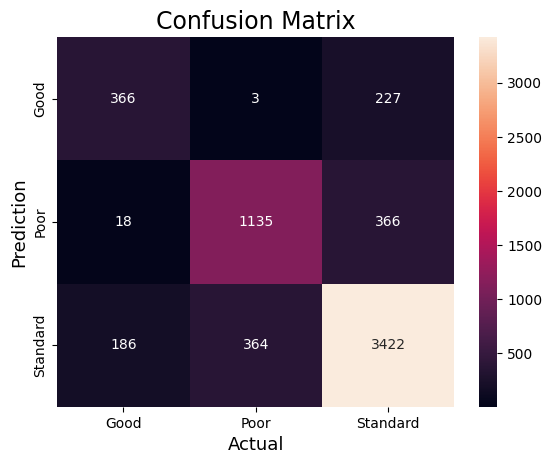

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Good', 'Poor', 'Standard'],
            yticklabels=['Good', 'Poor', 'Standard'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [12]:
from joblib import Parallel, delayed
import joblib
joblib.dump(modelKNN, '../Saved Model/modelKKN.bin')
knn_from_joblib = joblib.load('../Saved Model/modelKKN.bin')
  
# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Poor',
       'Good'], dtype=object)

# Decision Tree

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
modelDT = DecisionTreeClassifier(criterion = "entropy", random_state = 1234,max_depth = 5, min_samples_leaf = 10)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=1234)

In [15]:
y_pred = modelDT.predict(X_test)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.756037456875308


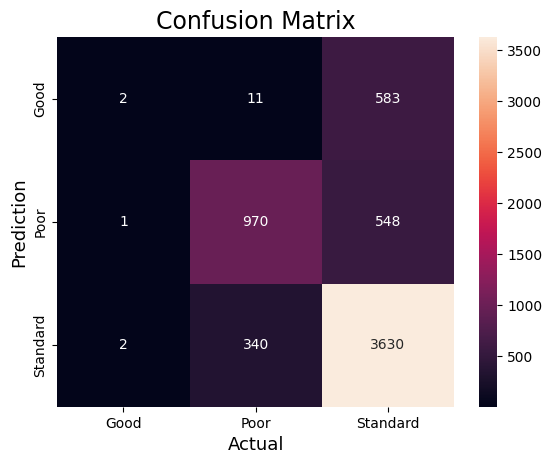

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Good', 'Poor', 'Standard'],
            yticklabels=['Good', 'Poor', 'Standard'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()